In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize

In [2]:
#=====Data Reading=====#
# Identify the directory path of this python program
#dir_path = os.path.dirname(os.path.realpath(__file__))

# Read in a csv to pandas dataframe
df = pd.read_csv('ionosphere.data', header = None)

In [23]:
print(df)

     0   1        2        3        4        5        6        7        8   \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          9   ...       25       26       27       28       29 

In [3]:
#=====Data Processing=====#
# Recategorize the classification labels into a binary classifier
categ = {"g" : 1, "b" : 0}
df[34] = [categ[item] for item in df[34]]

In [4]:
print(df.head(3))

   0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   1  
1 -0.06288 -0.13738 -0.02447   0  
2 -0.24180  0.56045 -0.38238   1  

[3 rows x 35 columns]


In [22]:
print(df.iloc[0:350,0:33])

     0   1        2        3        4        5        6        7        8   \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          9   ...       24       25       26       27       28 

# Spliting the Data Set

In [26]:
# Seperate inputs and outputs
labels = df[34]
inputs = df.drop([34],axis=1)

# Seperate data into a training/test set
input_train, input_test, output_train, output_test = train_test_split(inputs, 
                                                                      labels, test_size=0.33, 
                                                                      random_state=42)



print("Before OverSampling, counts of label '1': {}".format(sum(output_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(output_train==0)))

Before OverSampling, counts of label '1': 154
Before OverSampling, counts of label '0': 81 



# SVC Without PCA

In [27]:
sm = SMOTE(random_state = 27, sampling_strategy = 1.0)
input_train_res,output_train_res = sm.fit_resample(input_train,output_train)

In [28]:
print("After OverSampling, counts of label '1': {}".format(sum(output_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(output_train_res==0)))

After OverSampling, counts of label '1': 154
After OverSampling, counts of label '0': 154 



## SVC on the Original DataSet -- Without Resample

In [29]:
from sklearn.svm import SVC
modelOriginal = SVC()
histOriginal = modelOriginal.fit(input_train,output_train)
predictionsOriginal = modelOriginal.predict(input_test)
confMatSVCOriginal = confusion_matrix(output_test,predictionsOriginal)
print(confMatSVCOriginal)

[[38  7]
 [ 0 71]]


## SVC on the Resampled DataSet

In [30]:
modelResample = SVC()
histResample = modelResample.fit(input_train_res,output_train_res)
predictionsResample = modelResample.predict(input_test)
confMatSVCResample = confusion_matrix(output_test,predictionsResample)
print(confMatSVCResample)

[[41  4]
 [ 0 71]]


# Introducing PCA

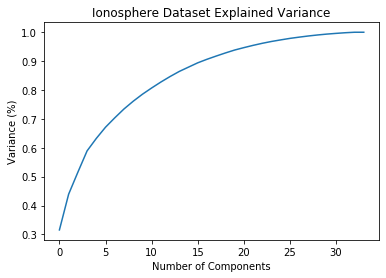

(235, 34)
(235, 17)


In [31]:
#Dimentioanlity reduction
from sklearn.decomposition import PCA
pca = PCA() 

input_train = pca.fit_transform(input_train)
input_test = pca.transform(input_test)
total=sum(pca.explained_variance_)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Ionosphere Dataset Explained Variance')
plt.show()

k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1

#Apply PCA with n_components
pca = PCA(n_components=k)

print(input_train.shape)
input_train_PCA = pca.fit_transform(input_train)
input_test_PCA = pca.transform(input_test)
print(input_train_PCA.shape)

## Using PCA on the original dataset without Resampling

In [32]:
modelOriginalPCA = SVC()
histOriginalPCA = modelOriginalPCA.fit(input_train_PCA,output_train)
predictionsOriginalPCA = modelOriginalPCA.predict(input_test_PCA)
confMatSVCOriginalPCA = confusion_matrix(output_test,predictionsOriginalPCA)
print(confMatSVCOriginalPCA)

[[39  6]
 [ 0 71]]


## Using PCA with Resampling

In [33]:
print(input_train_res.shape)
input_train_res_PCA = pca.fit_transform(input_train_res)
input_test_res_PCA = pca.transform(input_test)
print(input_train_res_PCA.shape)

modelResamplePCA = SVC()
histResamplePCA = modelResamplePCA.fit(input_train_res_PCA,output_train_res)
predictionsResamplePCA = modelResamplePCA.predict(input_test_PCA)
confMatSVCResamplePCA = confusion_matrix(output_test,predictionsResamplePCA)
print(confMatSVCResamplePCA)

(308, 34)
(308, 17)
[[41  4]
 [14 57]]


# Function to Find the Heidke Score from Confusion Matrix

In [40]:
def findHeidkeScore(confMat):
    TP = confMat[1][1]
    TN = confMat[0][0]
    FN = confMat[1][0]
    FP = confMat[0][1]
    HSS = 2.*((TP*TN) - (FN*FP))/((TP + FN)*(FN + TN) + (TP + FP)*(FP + TN)) # Heidke Skill Score
    #TSS = (TP/(TP + FN)) - (FP/(FP + TN)) # True Skill Score
    #BIAS = (TP + FP)/(TP + FN) # Bias of Detection
    #POD = TP/(TP + FN) # Probability of Detection
    #POFD = FP/(TN + FP) # Probablity of False Detection
    #FAR = FP/(TP + FP) # False Alarm Ratio
    #TS = TP/(TP + FN + FP) # Threat Score
    #OR = (TP*TN)/(FN*FP) # Odds Ratio
    return HSS

def findThreatScore(confMat):
    #How well did the forecast "yes" events correspond to the observed "yes" events?
    TP = confMat[1][1]
    TN = confMat[0][0]
    FN = confMat[1][0]
    FP = confMat[0][1]
    TS = TP/(TP+FN+FP)
    return TS

In [41]:
print('HSS - SVC on Origianl Dataset:',findHeidkeScore(confMatSVCOriginal),'TSS - SVC on Origianl Dataset:',findThreatScore(confMatSVCOriginal))
print('HSS - SVC on Resampled Dataset:',findHeidkeScore(confMatSVCResample),'TSS - SVC on Resampled Dataset:',findThreatScore(confMatSVCResample))
print('HSS - SVC on Original Dataset with PCA:',findHeidkeScore(confMatSVCOriginalPCA),'TSS - SVC on Original Dataset with PCA:',findThreatScore(confMatSVCOriginalPCA))
print('HSS - SVC on Resampled Dataset with PCA:',findHeidkeScore(confMatSVCResamplePCA),'TSS - SVC on Resampled Dataset with PCA:',findThreatScore(confMatSVCResamplePCA))


HSS - SVC on Origianl Dataset: 0.8692010309278351 TSS - SVC on Origianl Dataset: 0.9102564102564102
HSS - SVC on Resampled Dataset: 0.926185173401209 TSS - SVC on Resampled Dataset: 0.9466666666666667
HSS - SVC on Original Dataset with PCA: 0.888354186717998 TSS - SVC on Original Dataset with PCA: 0.922077922077922
HSS - SVC on Resampled Dataset with PCA: 0.686015037593985 TSS - SVC on Resampled Dataset with PCA: 0.76


# Using RFC

In [54]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(max_depth=20, random_state=0)
modelRFC.fit(input_train_res_PCA,output_train_res)
predictRFCResamplePCA = modelRFC.predict(input_test_PCA)
confMatRFCResamplePCA = confusion_matrix(output_test,predictRFCResamplePCA)
print(confMatRFCResamplePCA)
print ("\naccuracy_score :",accuracy_score(output_test,predictRFCResamplePCA))
print('HSS - RFC on Resampled Dataset with PCA:',findHeidkeScore(confMatRFCResamplePCA),
      'TSS - RFC on Resampled Dataset with PCA:',findThreatScore(confMatRFCResamplePCA))



[[40  5]
 [21 50]]

accuracy_score : 0.7758620689655172
HSS - RFC on Resampled Dataset with PCA: 0.5568615927123126 TSS - RFC on Resampled Dataset with PCA: 0.6578947368421053


# Using NN

In [34]:
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
#import tensorboard
#from tensorboard.callbacks import TensorBoard
import time
NAME = "ionoSphere_data-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))




inputTrainTest, inputVal, outputTrainTest, outputVal = train_test_split(inputs, 
                                                                      labels, test_size=0.2, 
                                                                      random_state=42)




modelNN = keras.Sequential()
modelNN.add(keras.layers.Dense(17,input_dim=17,activation='relu'))
modelNN.add(keras.layers.Dense(32,activation='relu'))
modelNN.add(keras.layers.Dense(1,activation='sigmoid'))
print(modelNN.summary())
modelNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
histNN = modelNN.fit(np.asarray(input_train_res_PCA),
                     np.asarray(output_train_res),
                     epochs=20,batch_size=1,
                     validation_data=(np.asarray(input_test_PCA), 
                                      np.asarray(output_test)),
                     verbose=2,
                     callbacks = [tensorboard]
                    )


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________
None
Train on 308 samples, validate on 116 samples
Epoch 1/20
308/308 - 3s - loss: 0.5645 - accuracy: 0.7468 - val_loss: 0.6809 - val_accuracy: 0.6724
Epoch 2/20
308/308 - 1s - loss: 0.3468 - accuracy: 0.8961 - val_loss: 0.7210 - val_accuracy: 0.6724
Epoch 3/20
308/308 - 1s - loss: 0.2412 - accuracy: 0.9188 - val_loss: 0.7662 - val_accuracy: 0.7155
Epoch 4/20
308/308 - 1s - loss: 0.1

In [36]:
score = modelNN.evaluate(np.asarray(input_test_PCA), np.asarray(output_test), verbose=2)

116/1 - 0s - loss: 1.1477 - accuracy: 0.7069


In [55]:
predictions = modelNN.predict_classes(input_test_PCA, verbose = 2)
confMatNNResamplePCA = confusion_matrix(output_test,predictions.ravel())
print(confMatNNResamplePCA)
#print ("\naccuracy_score :",accuracy_score(output_test,predictRFCResamplePCA))
print('HSS - NN on Resampled Dataset with PCA:',findHeidkeScore(confMatNNResamplePCA),
      'TSS - NN on Resampled Dataset with PCA:',findThreatScore(confMatNNResamplePCA))

116/1 - 0s
[[26 19]
 [15 56]]
HSS - NN on Resampled Dataset with PCA: 0.3725739739102768 TSS - NN on Resampled Dataset with PCA: 0.6222222222222222


# Pl. Ignore below mentioned codes

In [78]:
outputTestNP=np.asarray(output_test)
print(outputTestNP)
print(outputTestNP.shape)
outputTestNP=outputTestNP.T
print(outputTestNP.shape)

[1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 0 0]
(116,)
(116,)


[1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 0]


[[-2.38703277  0.14618434  0.37593862 ...  0.09366966 -0.06555789
  -0.03665249]
 [ 1.00748113 -0.98293212  0.90184493 ... -0.42357383 -0.0431981
  -0.2440614 ]
 [ 1.67553819  2.73114519  0.46908314 ... -0.30426021  0.0147842
  -0.1143759 ]
 ...
 [ 0.92481666  0.07656656 -0.50871365 ...  0.18506455 -0.12358857
   0.37576084]
 [ 1.16762239  0.05869043 -0.87198119 ...  0.27896783 -0.15570482
  -0.11885328]
 [-1.1163096  -0.45525502 -0.28090563 ...  0.3642258  -0.62217158
  -0.08933785]]


(308, 17)

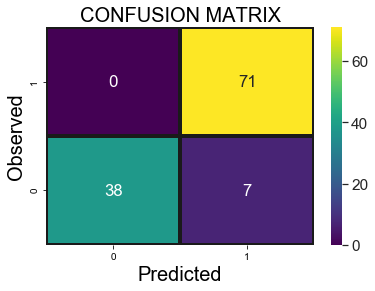

In [17]:
import seaborn as sns

fig, ax = plt.subplots()

sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(output_test,predictions),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
ax.set_ylim([0,2])
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Observed",fontsize=20)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = SVC_conf[1][1]
TN = SVC_conf[0][0]
FN = SVC_conf[1][0]
FP = SVC_conf[0][1]



In [18]:
SVC_HSS = 2.*((TP*TN) - (FN*FP))/((TP + FN)*(FN + TN) + (TP + FP)*(FP + TN)) # Heidke Skill Score
TSS = (TP/(TP + FN)) - (FP/(FP + TN)) # True Skill Score
BIAS = (TP + FP)/(TP + FN) # Bias of Detection
POD = TP/(TP + FN) # Probability of Detection
POFD = FP/(TN + FP) # Probablity of False Detection
FAR = FP/(TP + FP) # False Alarm Ratio
TS = TP/(TP + FN + FP) # Threat Score
OR = (TP*TN)/(FN*FP) # Odds Ratio

/Users/Pramit/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


In [36]:
accuracies = cross_val_score(estimator = model, X = input_train, y = output_train, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

# Accuracy
print ("\naccuracy_score :",accuracy_score(output_test, predictions))

Accuracy mean: 0.9361702127659575
Accuracy variance: 0.035602554320598986

accuracy_score : 0.9396551724137931


In [37]:
svc_conf = confusion_matrix(output_test,predictions)

In [38]:
print(svc_conf)

[[38  7]
 [ 0 71]]
